In [1]:
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as T
 
from torch_geometric.data import Data

import numpy as np

import matplotlib.pyplot as plt
import skimage as ski

Available datasets:

RGB color:
+ CIFAR10  (cifar10_slic)
+ CIFAR100 (cifar100_slic)
+ STL10  (stl10_slic)
+ StanfordCars (stanfordcars_slic)

Grayscale:
+ MNIST (mnist_slic)
+ FashionMNIST (fashion_mnist_slic)

In [2]:
import mnist_slic 
import fashion_mnist_slic

import cifar10_slic
import cifar100_slic
import stl10_slic
import stanfordcars_slic
import geo_ds_slic

In [3]:
test_ds  = fashion_mnist_slic.SuperPixelGraphFashionMNIST(root=None, 
                                               n_segments=75,
                                               compactness=0.1,
                                               features=None,
                                               graph_type='16NNSpatial',
                                               slic_method='SLIC0',
                                               train=False,
                                               pre_select_features=False)

Selected features for 16NNSpatial graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid
FashionMNIST Loaded.
Average number of nodes: 78.0985 with standard deviation 1.9314755369923795
Average number of edges: 2499.152 with standard deviation 61.807217183756144


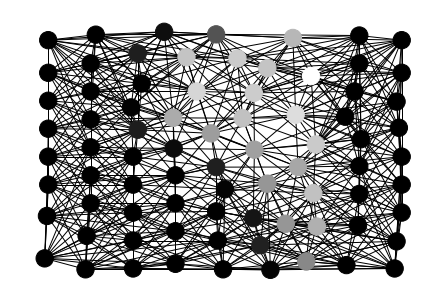

In [13]:
import networkx as nx
from torch_geometric.utils import to_networkx

index = 0
g = test_ds[index]
pos = g.pos.numpy()
features = g.x.numpy()

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')


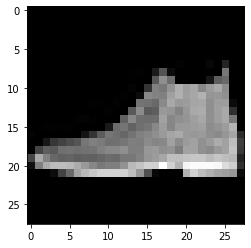

In [14]:
og_ds = datasets.FashionMNIST(root='fashion_mnist/test', train=False)
img, _ = og_ds[index]
plt.imshow(img, cmap='gray')

## Image samples

In [26]:
sample_idxs = [0, 10, 100, 1000, 1500, 1750, 2000, 2250, 2500, 2750]
def img_samples(ds, cmap=None, label_dict=None):
    if not label_dict:
        label_dict = {i:i for i in range(100)}
    fig, axs = plt.subplots(2, 5, figsize=(29, 12))
    print(type(axs), type(axs[0]))
    for plot_idx, ds_idx in enumerate(sample_idxs):
        img, label = ds[ds_idx]
        i, j = int(plot_idx / 5), int(plot_idx % 5)
        if cmap:
            axs[i,j].imshow(img, cmap=cmap)
        else:
            axs[i,j].imshow(img)
        axs[i,j].axis('off')
        axs[i,j].set_title(label_dict[label])
    plt.show()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


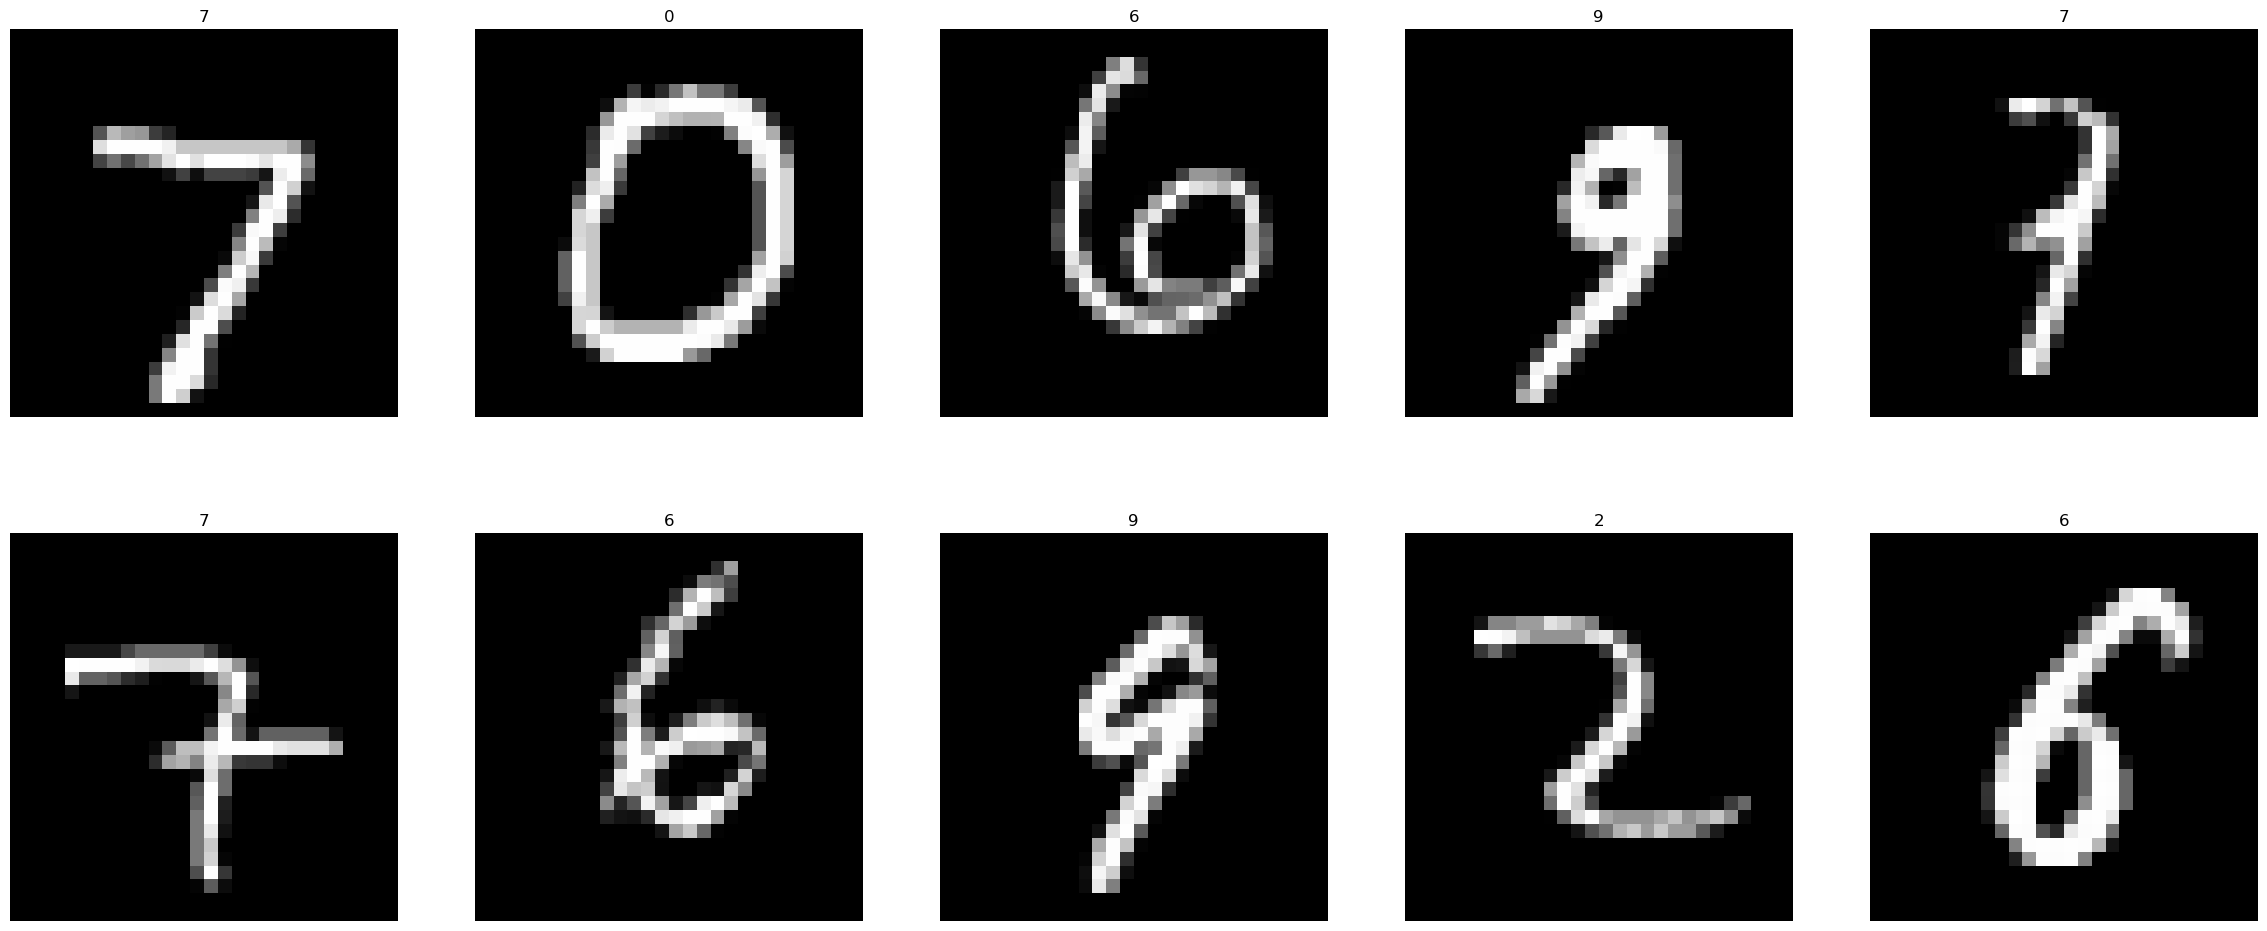

In [27]:
ds = datasets.MNIST(root="mnist/test", train=False, download=True, transform=None)
img_samples(ds, cmap='gray')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


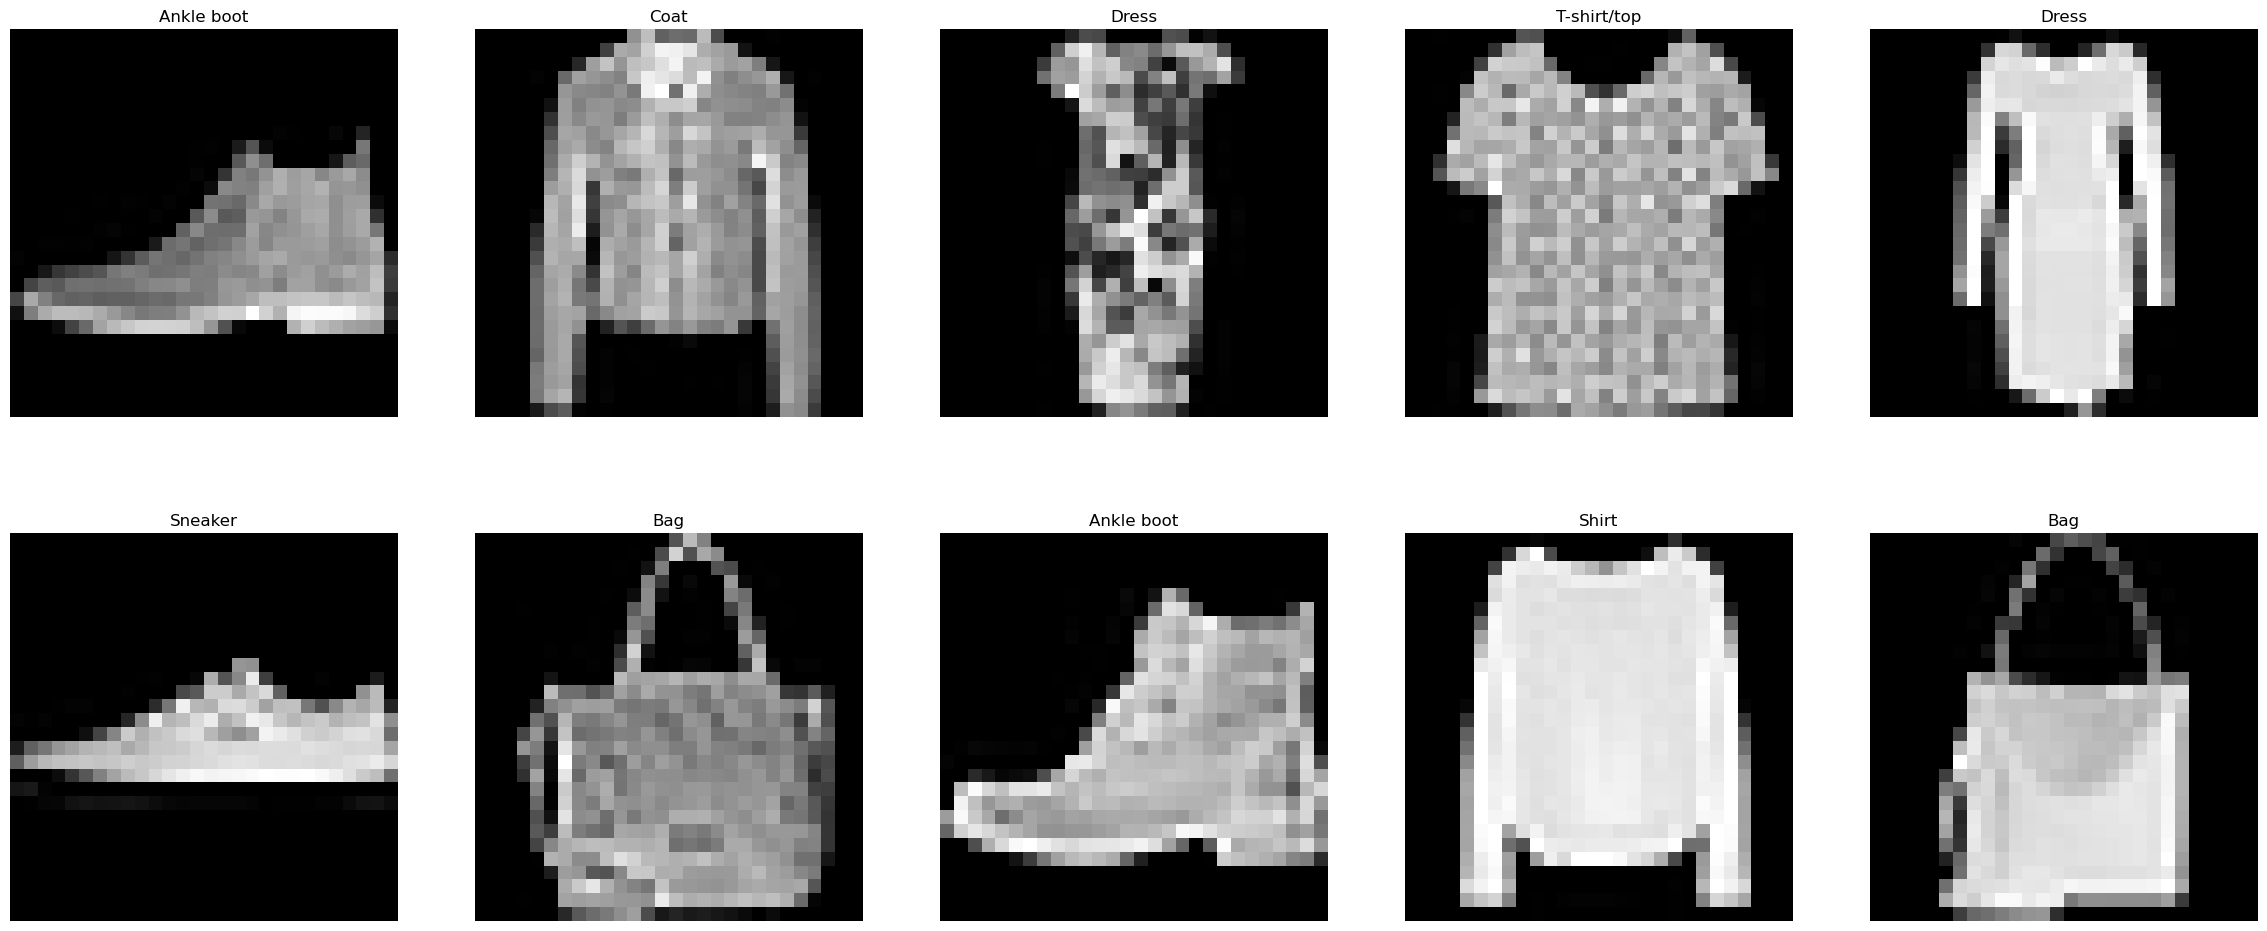

In [29]:
ds = datasets.FashionMNIST(root="fashion_mnist/test", train=False, download=True, transform=None)
img_samples(ds, cmap='gray', label_dict={i:ds.classes[i] for i in range(10)})

Files already downloaded and verified
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


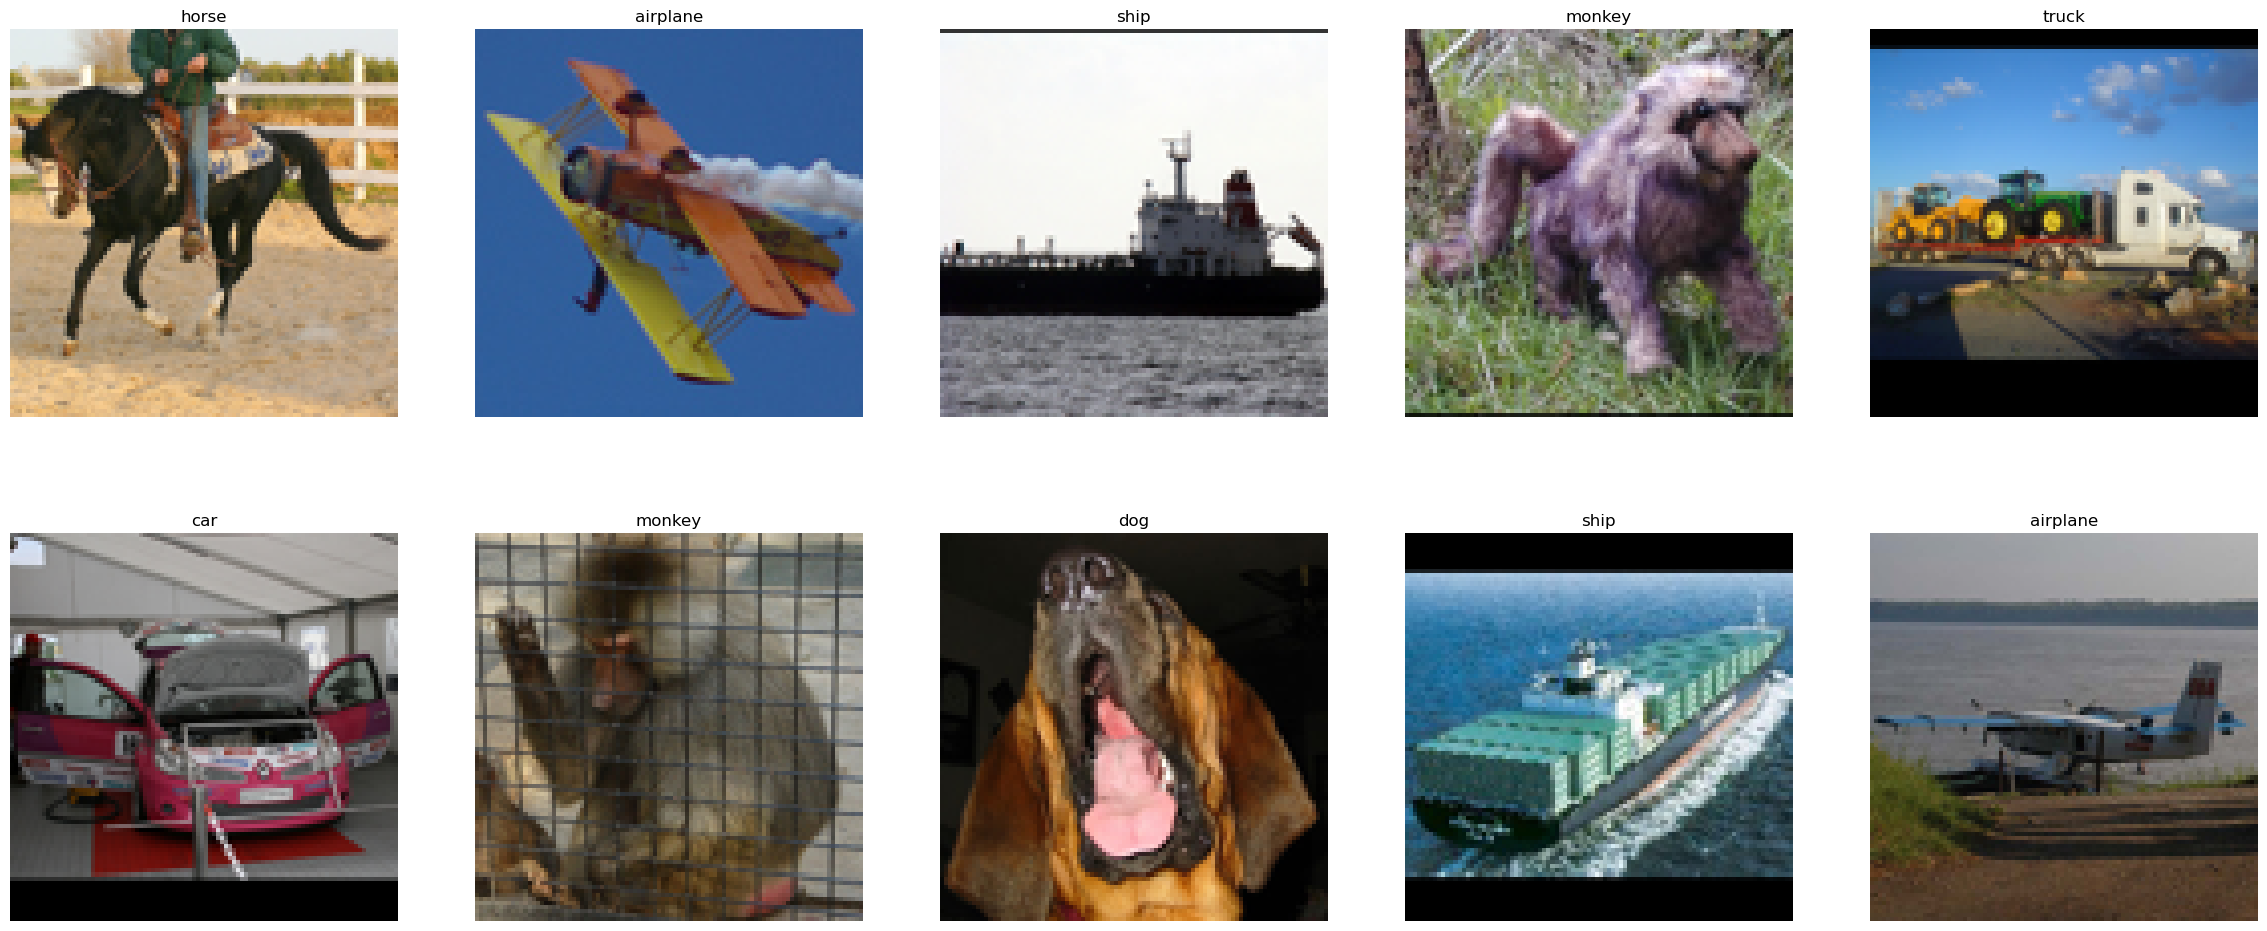

In [30]:
ds = datasets.STL10(root="stl10/test", split='test', download=True, transform=None)
img_samples(ds, label_dict={i:ds.classes[i] for i in range(10)})

Files already downloaded and verified
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


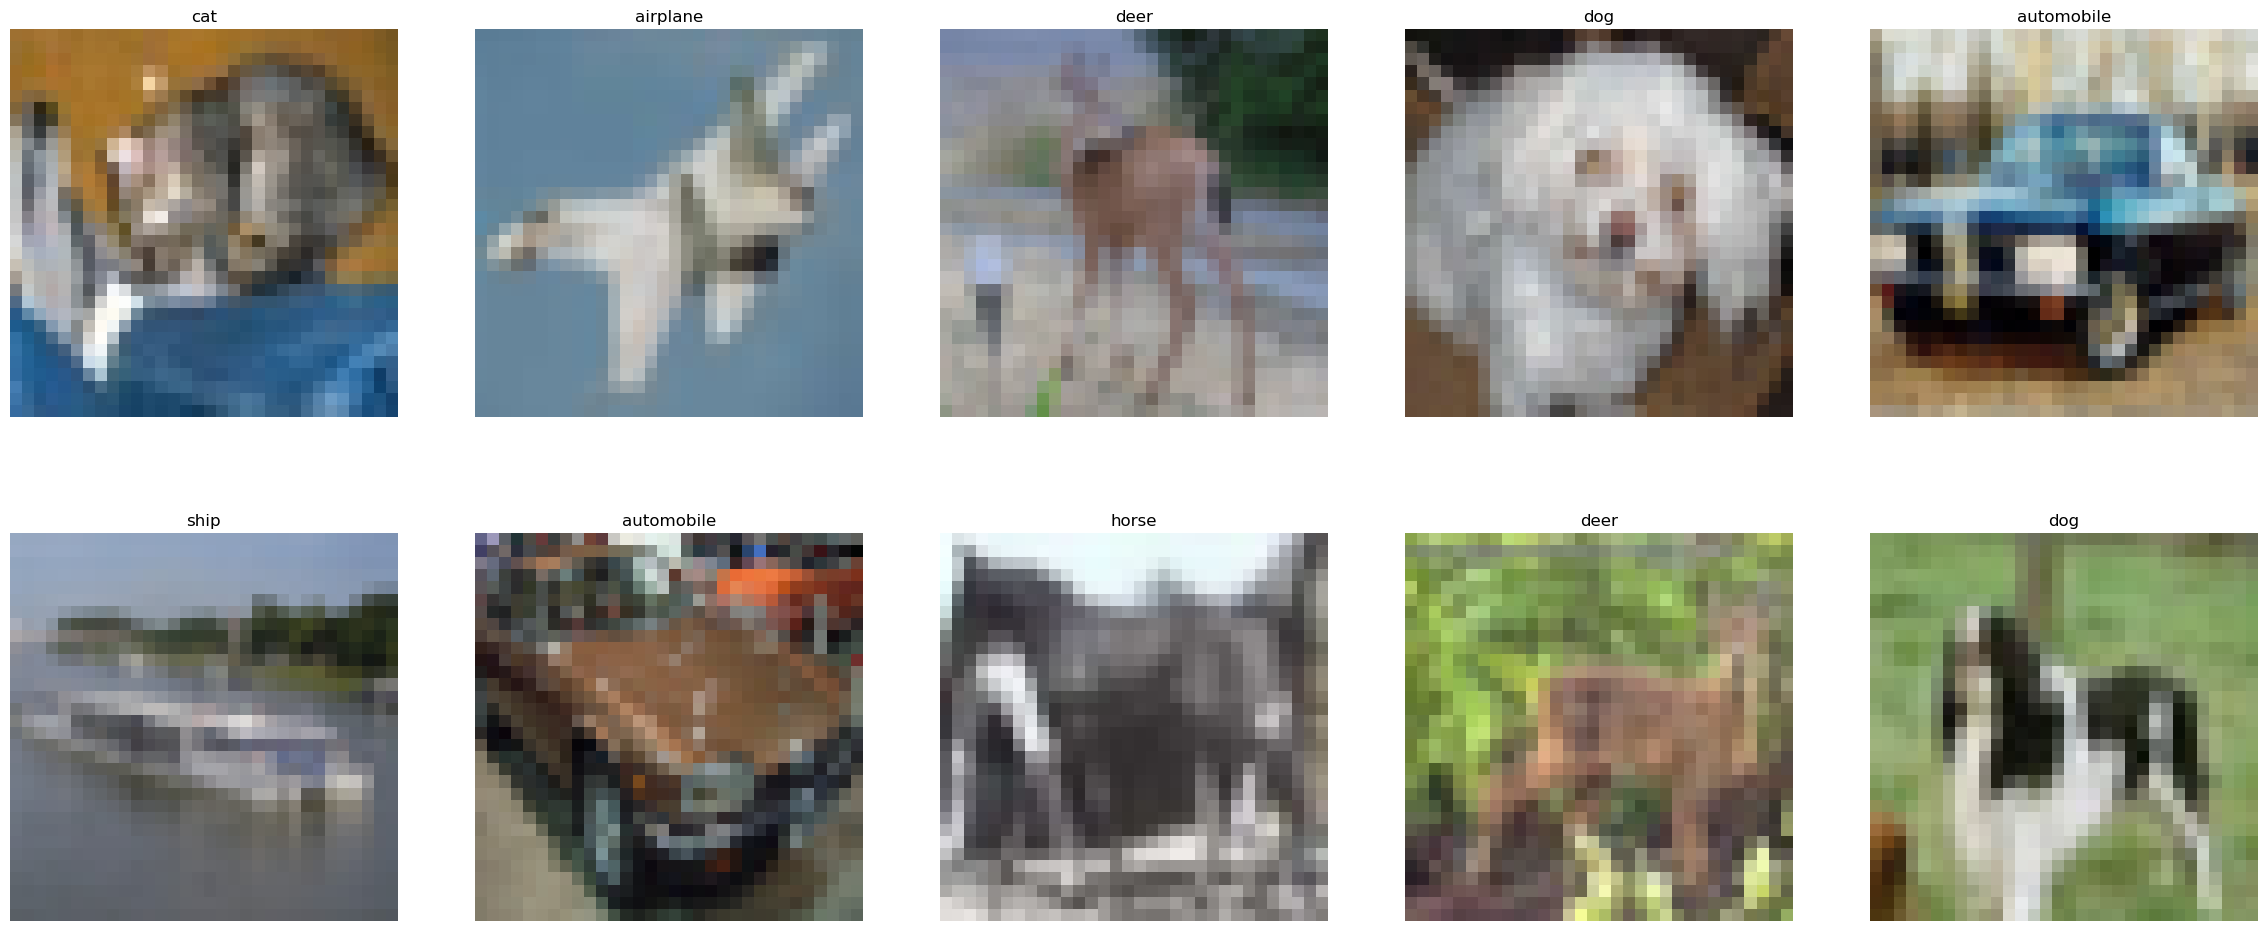

In [31]:
ds = datasets.CIFAR10(root="cifar10/test", train=False, download=True, transform=None)
img_samples(ds, label_dict={i:ds.classes[i] for i in range(10)})

# Feature building

In [3]:
from compute_features import color_features, grayscale_features
import networkx as nx
from torch_geometric.utils import to_networkx

## Greyscale

Required pre-processing for grayscale

In [4]:

ds = datasets.MNIST(root="mnist/test", train=False, download=True, transform=T.ToTensor())

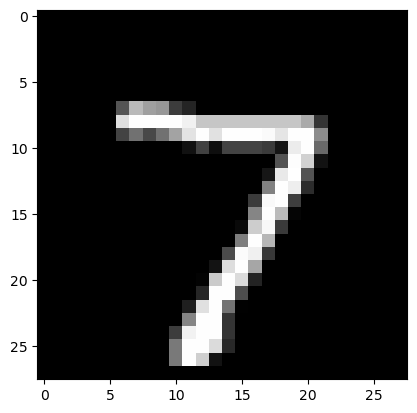

In [5]:
img, y = ds[0]
_, dim0, dim1 = img.shape
img_np = img.view(dim0, dim1).numpy()
plt.imsave('imgs/mnist-ex.png', img_np, cmap='gray')
plt.imshow(img_np, cmap='gray')

In [6]:
img, y = ds[67]
_, dim0, dim1 = img.shape
img_np = img.view(dim0, dim1).numpy()
n_segments = 75
compactness = 0.1
features, edge_index, s = grayscale_features(img_np, n_segments, 0, 0)
print(features.shape, edge_index.shape, s.shape)

(80, 7) (2, 398) (28, 28)


Segmentation result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


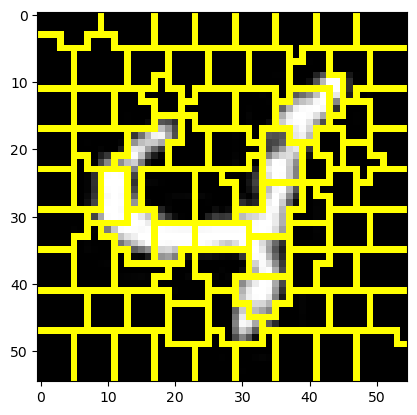

In [7]:
plt.imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))

Graph

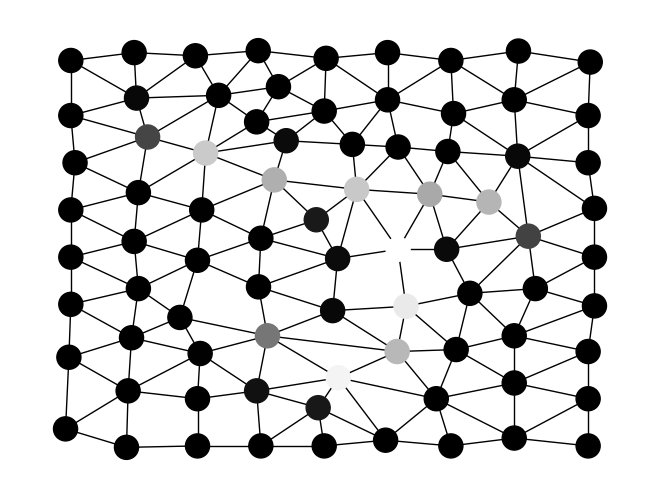

In [8]:
pos = features[:, 2:4]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=False)

In [5]:
from scipy import ndimage

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


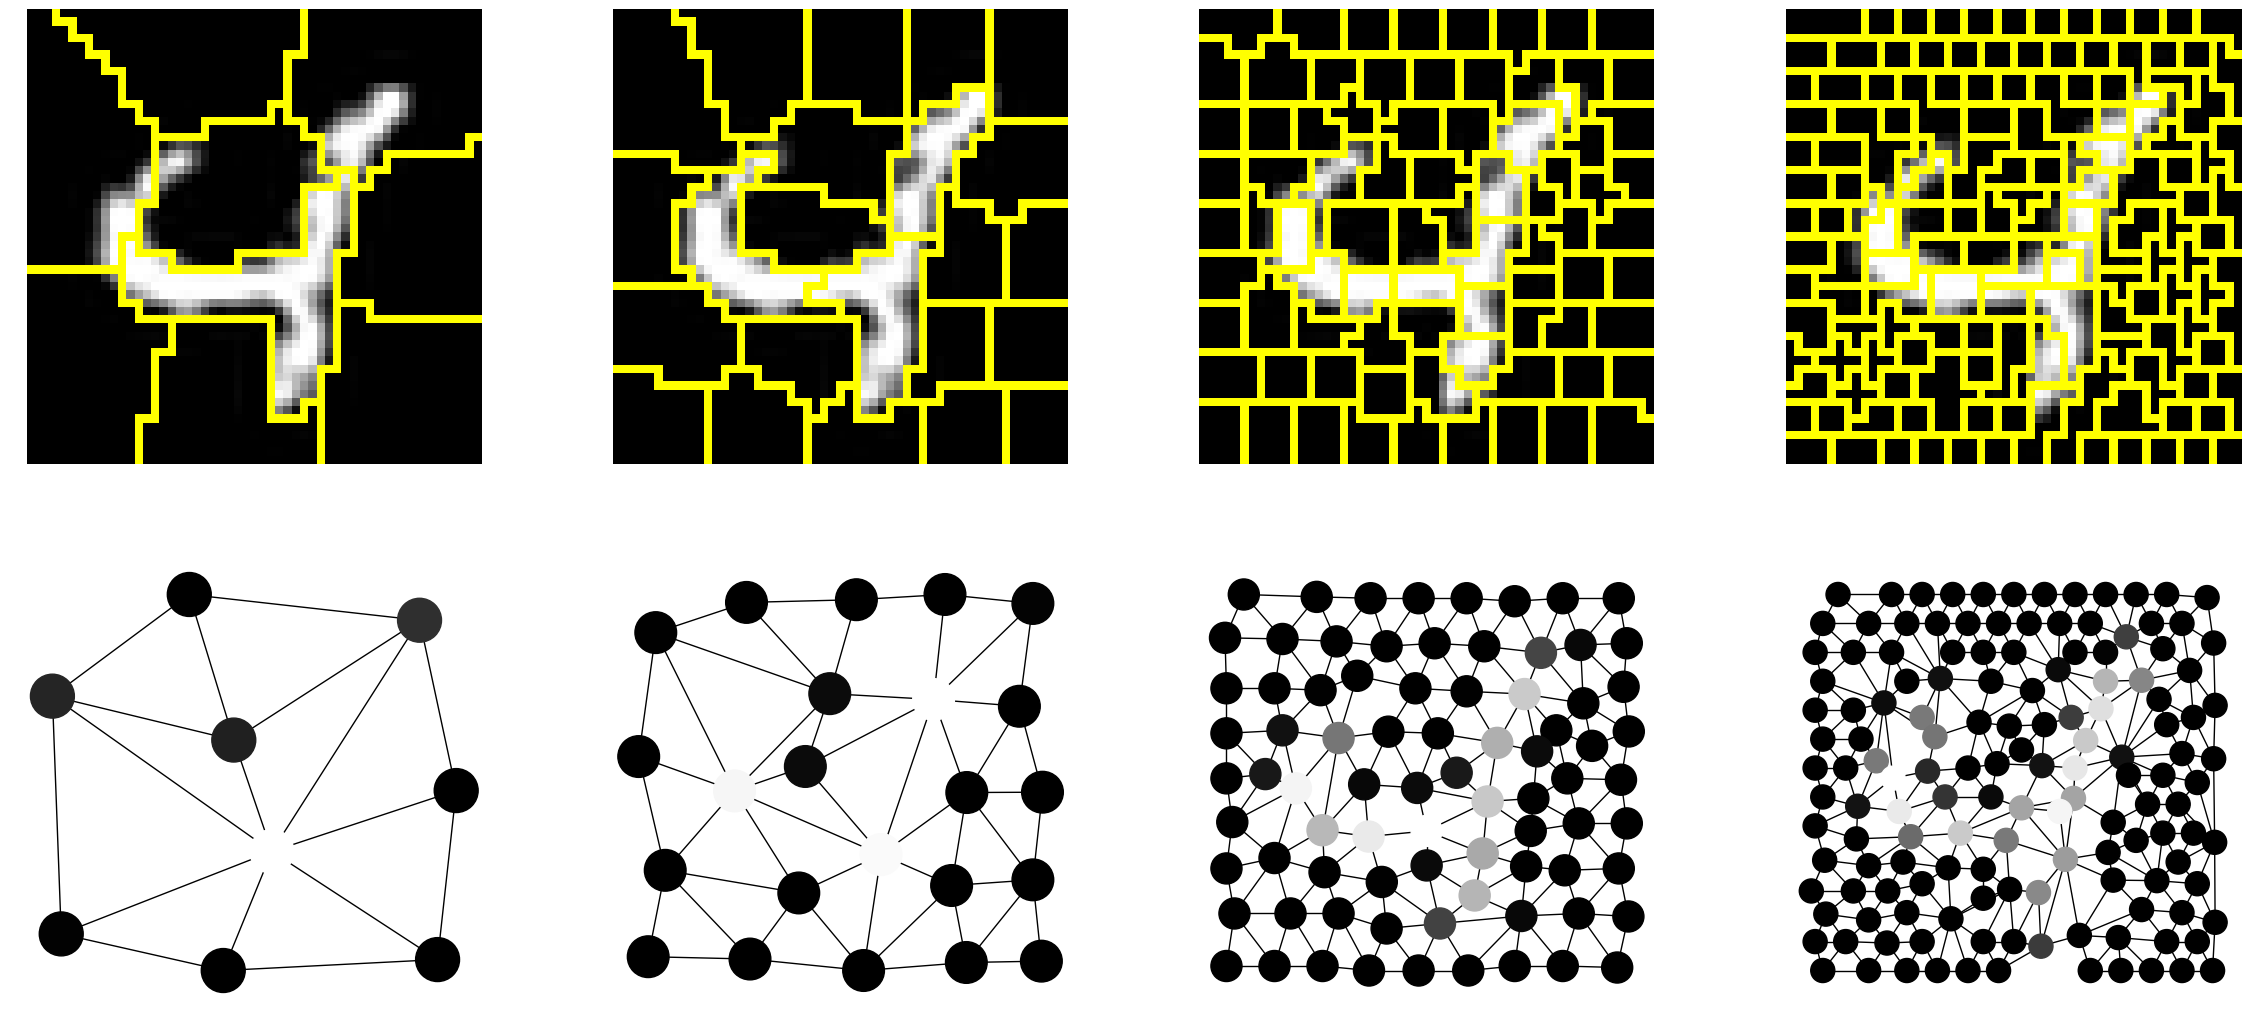

In [11]:
figsize = (29, 13)
fig, ax = plt.subplots(2, 4, figsize=figsize)
nss = [10, 20, 50, 100]

for nsi, ns in enumerate(nss):
    features, edge_index, s = grayscale_features(img_np, ns, 0, 0)
    
    ax[0, nsi].imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))
    ax[0, nsi].axis('off')
    
    pos = features[:, 2:4]
    pos = np.array([[i[1], -i[0]] for i in pos ])
    g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
    nx_g = to_networkx(g, to_undirected=True)
    nx_color = features[:,0]
    nx_pos = dict(zip(range(g.num_nodes), pos))
    node_sizes = [1000, 900, 500, 300]
    nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=False, ax=ax[1, nsi], node_size=node_sizes[nsi])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


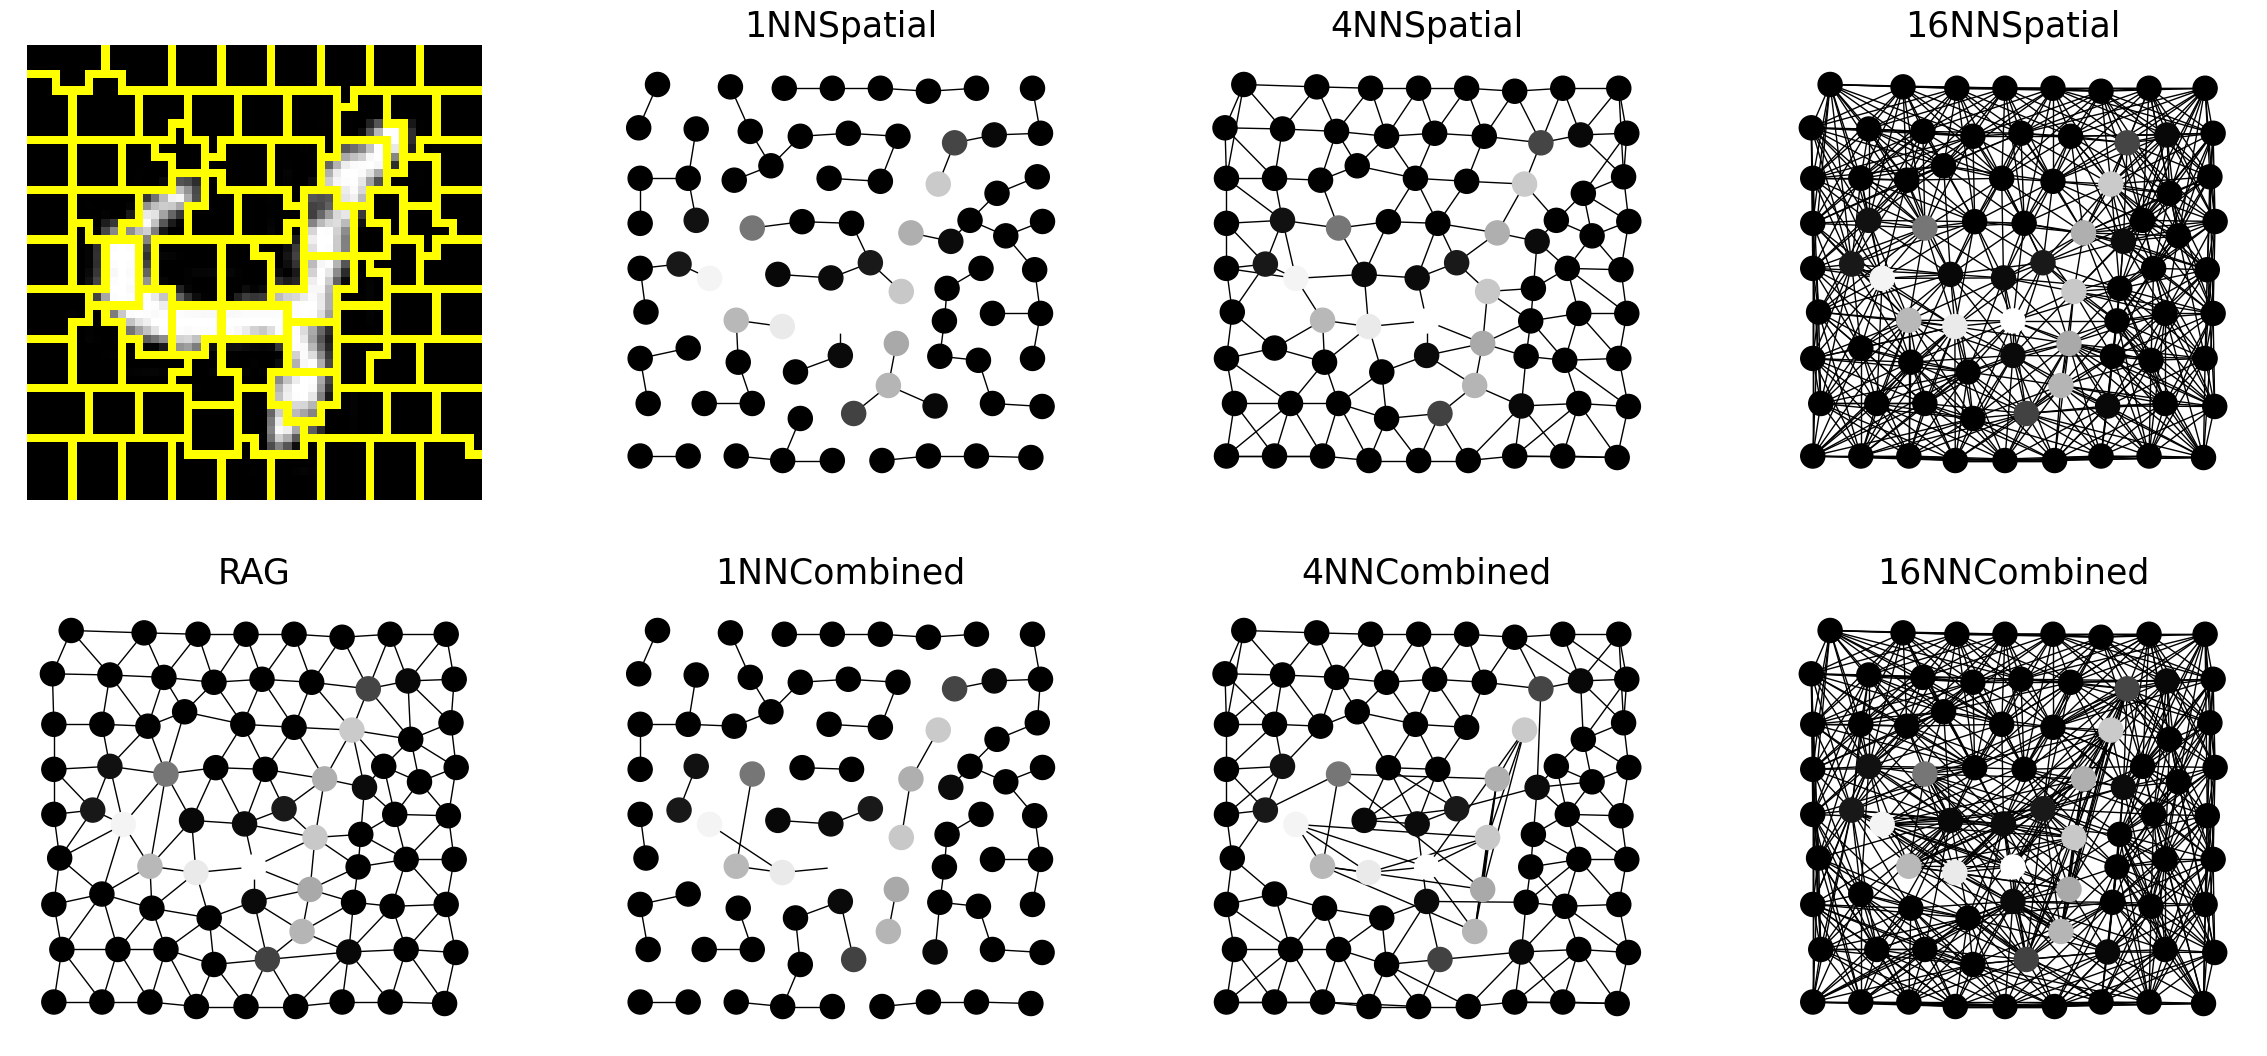

In [13]:
figsize = (29, 13)
fig, ax = plt.subplots(2, 4, figsize=figsize)
nss = [1, 4, 16]
si = [1,3,5]
fi = [6,8,10]

features, edge_index, s = grayscale_features(img_np, 75, 0, 0)
ax[0, 0].imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))
ax[0, 0].axis('off')

pos = features[:, 2:4]
pos = np.array([[i[1], -i[0]] for i in pos ])
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=False, ax=ax[1, 0])
ax[1, 0].set_title('RAG', fontsize=25) 
for nsi, ns in enumerate(nss):
    features, edge_index, s = grayscale_features(img_np, 75, si[nsi], 0)
    pos = features[:, 2:4]
    pos = np.array([[i[1], -i[0]] for i in pos ])
    g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
    nx_g = to_networkx(g, to_undirected=True)
    nx_color = features[:,0]
    nx_pos = dict(zip(range(g.num_nodes), pos))
    nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=False, ax=ax[0, nsi+1])
    ax[0, nsi+1].set_title(f'{ns}NNSpatial', fontsize=25)

    features, edge_index, s = grayscale_features(img_np, 75, fi[nsi], 0)
    pos = features[:, 2:4]
    pos = np.array([[i[1], -i[0]] for i in pos ])
    g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)
    nx_g = to_networkx(g, to_undirected=True)
    nx_color = features[:,0]
    nx_pos = dict(zip(range(g.num_nodes), pos))
    nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap="gray", with_labels=False, ax=ax[1, nsi+1])
    ax[1, nsi+1].set_title(f'{ns}NNCombined', fontsize=25)

## Color

Required pre-processing for RGB images

In [1]:
ds = datasets.STL10(root="stl10/test", split='test', download=True, transform=T.ToTensor())

NameError: name 'datasets' is not defined

float32 1.0 0.0


NameError: name 'color_features' is not defined

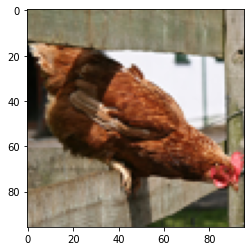

In [13]:
img, y = ds[6]
img_np = torch.stack([img[0], img[1], img[2]], dim=2).numpy()
plt.imsave('imgs/stl10-ex.png', img_np)
print(img_np.dtype, np.max(img_np), np.min(img_np))
plt.imshow(img_np)
n_segments = 75
compactness = 0.01
features, edge_index, s = color_features(img_np, n_segments, 8, 0)

Segmentation result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


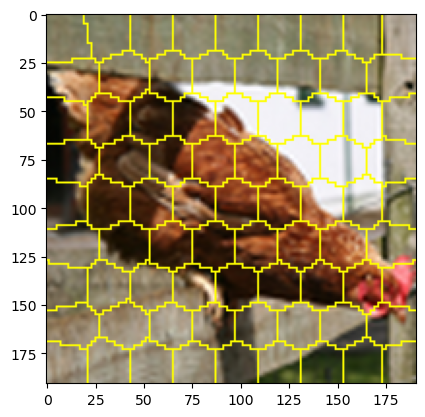

In [16]:

plt.imshow(ski.segmentation.mark_boundaries(img_np, s, mode='subpixel'))

Graph

0.8845315972963969 0.19694989422957102


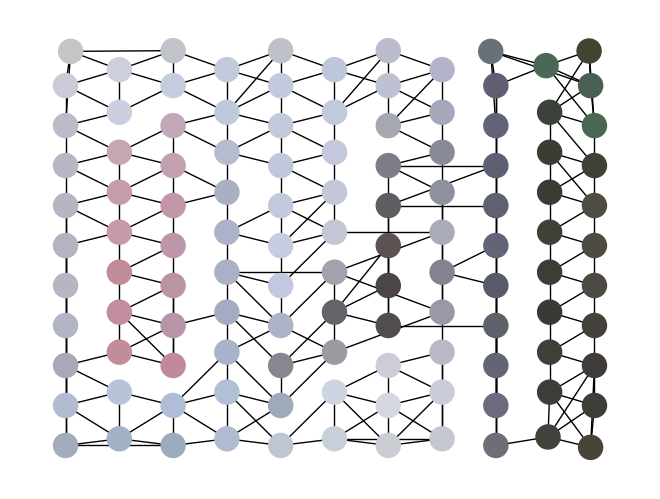

In [34]:

pos = features[:, 6:8]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float), y=y)

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0:3]
print(np.max(nx_color), np.min(nx_color))
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)

In [9]:
import networkx as nx
from torch_geometric.utils import to_networkx

In [5]:
n_segments = 75
compactness = 0.1
graph_type = 'RAG'
slic_method = 'SLIC0'
features = ['avg_color',
            'std_deviation_color',
            'centroid',
            'std_deviation_centroid']
test_ds  = cifar10_slic.SuperPixelGraphCIFAR10(root=None, 
                                                n_segments=n_segments,
                                                compactness=compactness,
                                                features=features,
                                                graph_type=graph_type,
                                                slic_method=slic_method,
                                                train=False,
                                                pre_select_features=False)

Selected features for RAG graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid
CIFAR10 Loaded.
Average number of nodes: 115.6446 with standard deviation 0.9644121732952151
Average number of edges: 607.8484 with standard deviation 5.920288628099141


Files already downloaded and verified


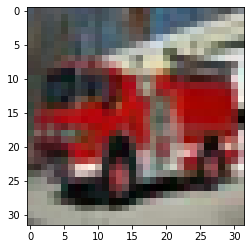

In [7]:
idx = 23
img = test_ds.get_og_img(idx)
plt.imshow(img)

0.779085 0.0


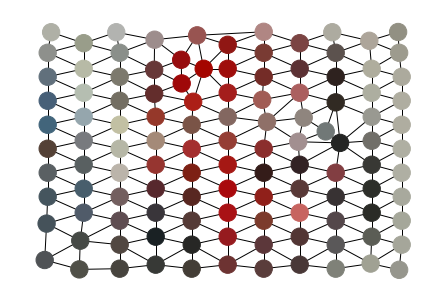

In [14]:
g = test_ds[idx]

nx_g = to_networkx(g, to_undirected=True)
nx_color = g.x[:,0:3].numpy()
print(np.max(nx_color), np.min(nx_color))
nx_pos = dict(zip(range(g.num_nodes), g.pos.numpy()))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)
plt.savefig('test.png')

# GEO_DS

(817, 580, 3) float32
0.0 1.0


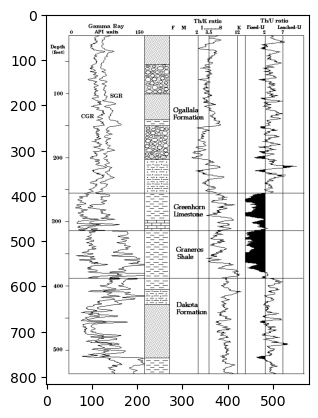

In [3]:
import csv
import re
from skimage.io import imread
from skimage.color import gray2rgb
from PIL import Image
from PIL import PngImagePlugin
LARGE_ENOUGH_NUMBER = 100000
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

maior_img = '/1a5/sha1-1a54dbbcd92b447e8894bfe61c8acf7f75a0d618.jpg'
menor_img = '/049/sha1-04949cd016fd4c5a1dff0cb6d7e5375c21da6c5e.jpg'
maior_largura = '/2cd/sha1-2cda5f01b524d0c530e4fa043b333d84872070f5.jpg'
menor_largura = '/cb3/sha1-cb3486e085ff851e7b32124121a4e94105d13ee1.jpg'

segfault = '/0ce/sha1-0ce0d17b6f2c7b9957e3580f2a8c945d6ed89a30.gif'

index_path = '/home/julia/Documents/ds/labels/v14-one-tree.csv'
img_dir = '/home/julia/Documents/ds/images/by-hash'

img_name = '/004/sha1-0049ac19c848f4cf65ea7bc9c97237ff339ebfec.png'

img_name = segfault
with open(index_path, newline='') as index_file:
    with Image.open(img_dir + img_name) as img_pil:
        if img_pil.mode != 'RGB':
                img_pil = img_pil.convert('RGB')
        img_pil = np.asarray(img_pil, dtype=np.float32)/255.0
    
print(img_pil.shape, img_pil.dtype)
print(np.min(img_pil), np.max(img_pil))
plt.imshow(img_pil)



In [8]:
# np.set_printoptions(threshold=np.inf)
# np.set_printoptions(threshold=1000)
print(img_pil)

[[[0.8627451  0.8627451  0.8627451 ]
  [0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863]
  [0.8627451  0.8627451  0.8627451 ]]

 [[0.92156863 0.92156863 0.92156863]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.92156863 0.92156863 0.92156863]]

 [[0.92156863 0.92156863 0.92156863]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.92156863 0.92156863 0.92156863]]

 ...

 [[0.92156863 0.92156863 0.92156863]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.92156863 0.92156863 0.92156863]]

 [[0.92156863 0.92156863 0.92156863]
  [1.         1.         1.        ]


In [4]:
from compute_features import color_features, grayscale_features
import networkx as nx
from torch_geometric.utils import to_networkx

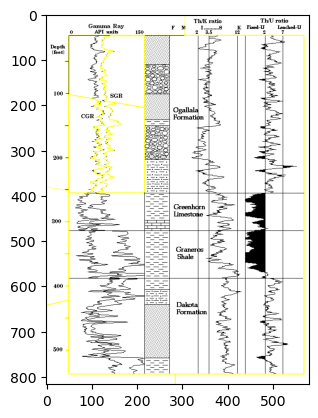

In [5]:
n_segments = 10
compactness = 0.01
features, edge_index, s = color_features(img_pil, n_segments, 0, 0)
plt.imshow(ski.segmentation.mark_boundaries(img_pil, s))


In [6]:
print(features)

[[9.68516746e-01 9.68516746e-01 9.68516746e-01 1.74619754e-01
  1.74619754e-01 1.74619754e-01 1.27281021e+02 8.35954067e+01
  1.20542272e+02 8.83858343e+01 3.13500000e+04 0.00000000e+00
  0.00000000e+00 9.68516746e-01 0.00000000e+00 0.00000000e+00
  1.74619754e-01]
 [9.60988532e-01 9.60988532e-01 9.60988532e-01 1.93622243e-01
  1.93622243e-01 1.93622243e-01 3.25949085e+02 4.79470496e+02
  3.37049655e+02 9.18178035e+01 2.75560000e+04 0.00000000e+00
  0.00000000e+00 9.60988532e-01 0.00000000e+00 0.00000000e+00
  1.93622243e-01]
 [8.92280087e-01 8.92280087e-01 8.92280087e-01 3.10026343e-01
  3.10026343e-01 3.10026343e-01 4.42506180e+02 3.28914052e+02
  2.16160663e+02 1.45729167e+02 3.46092000e+05 0.00000000e+00
  0.00000000e+00 8.92280087e-01 0.00000000e+00 0.00000000e+00
  3.10026343e-01]
 [9.83446200e-01 9.83446200e-01 9.83446200e-01 1.27592208e-01
  1.27592208e-01 1.27592208e-01 1.22988713e+02 1.73098044e+02
  4.35814506e+01 2.56365833e+01 1.32900000e+04 0.00000000e+00
  0.00000000e+00

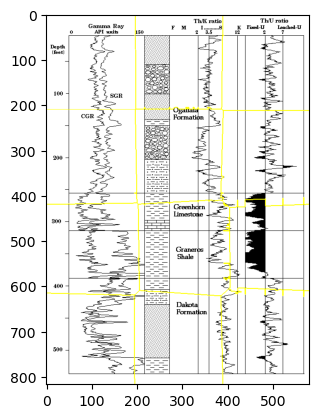

In [19]:
from skimage.segmentation import slic
s = slic(img_pil, n_segments=10, slic_zero=True, convert2lab=True, start_label=0)
plt.imshow(ski.segmentation.mark_boundaries(img_np, s))

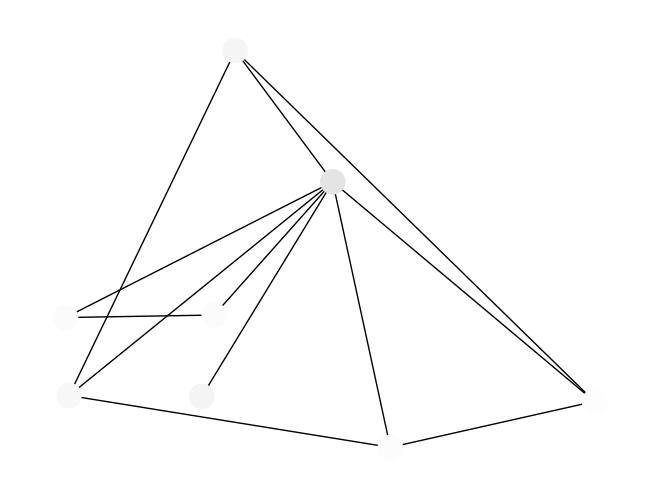

In [7]:
pos = features[:, 6:8]
g = Data(x=torch.from_numpy(features).to(torch.float), edge_index=torch.from_numpy(edge_index).to(torch.long), pos=torch.from_numpy(pos).to(torch.float))

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0:3]

nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)

In [7]:
import PIL
from PIL import features
PIL.features.pilinfo()

--------------------------------------------------------------------
Pillow 9.3.0
Python 3.10.6 (main, Nov  2 2022, 18:53:38) [GCC 11.3.0]
--------------------------------------------------------------------
Python modules loaded from /home/julia/.local/lib/python3.10/site-packages/PIL
Binary modules loaded from /home/julia/.local/lib/python3.10/site-packages/PIL
--------------------------------------------------------------------
--- PIL CORE support ok, compiled for 9.3.0
--- TKINTER support ok, loaded 8.6
--- FREETYPE2 support ok, loaded 2.12.1
--- LITTLECMS2 support ok, loaded 2.13.1
--- WEBP support ok, loaded 1.2.4
--- WEBP Transparency support ok
--- WEBPMUX support ok
--- WEBP Animation support ok
--- JPEG support ok, compiled for libjpeg-turbo 2.1.4
--- OPENJPEG (JPEG2000) support ok, loaded 2.5.0
--- ZLIB (PNG/ZIP) support ok, loaded 1.2.11
--- LIBTIFF support ok, loaded 4.4.0
--- RAQM (Bidirectional Text) support ok, loaded 0.9.0, fribidi 1.0.8, harfbuzz 5.3.1
*** LIBIMAGEQU

# Processing for CNNs

Resizing idea: 

Num. of nodes = [ 10,  20,  50,   100,   200,   400]

Img. sizes    = [3x3, 4x4, 7x7, 10x10, 14x14, 20x20]

In [33]:
import torchvision.transforms as T

In [7]:
img_sizes = [(3,3), (4,4), (7,7), (10,10), (14,14), (20,20)]

## Grayscale

In [9]:
ds = datasets.MNIST(root="mnist/test", train=False, download=True)

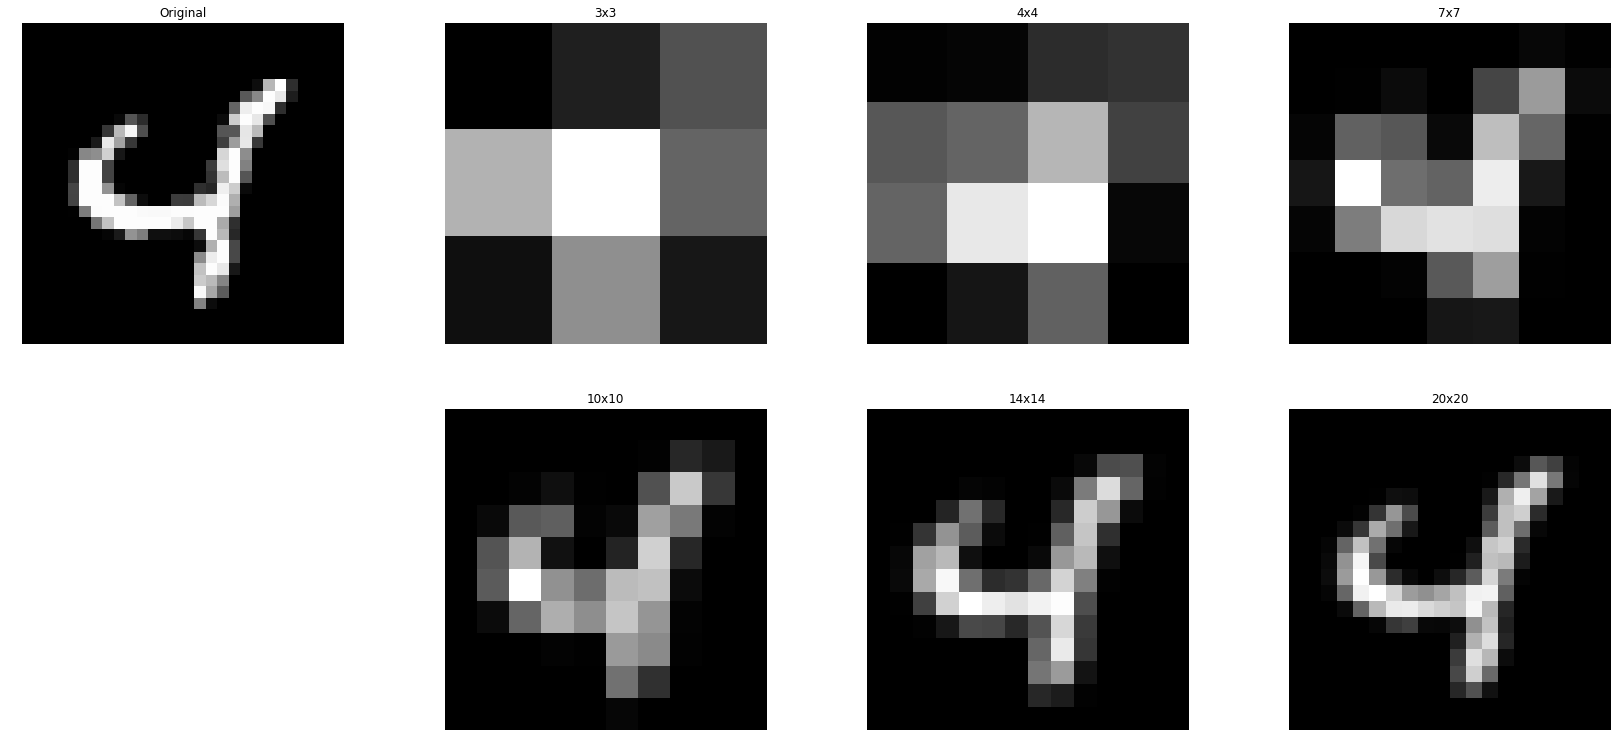

In [36]:
figsize = (29, 13)
fig, ax = plt.subplots(2, 4, figsize=figsize)

ax[1,0].axis('off')

ax[0,0].axis('off')
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Original')

for si, s in enumerate(img_sizes):
    ai, aj = int(si/3), int(si%3)+1
    ax[ai, aj].axis('off')
    ax[ai, aj].imshow(T.Resize(s)(img), cmap='gray')
    ax[ai, aj].set_title(f'{s[0]}x{s[1]}')
plt.show()